# INSTALL LIB

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# READ DATA

In [17]:

file_path = 'diem_thi_thpt_2024.csv'
data = pd.read_csv(file_path)

data.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


# 

# PLOT DATA

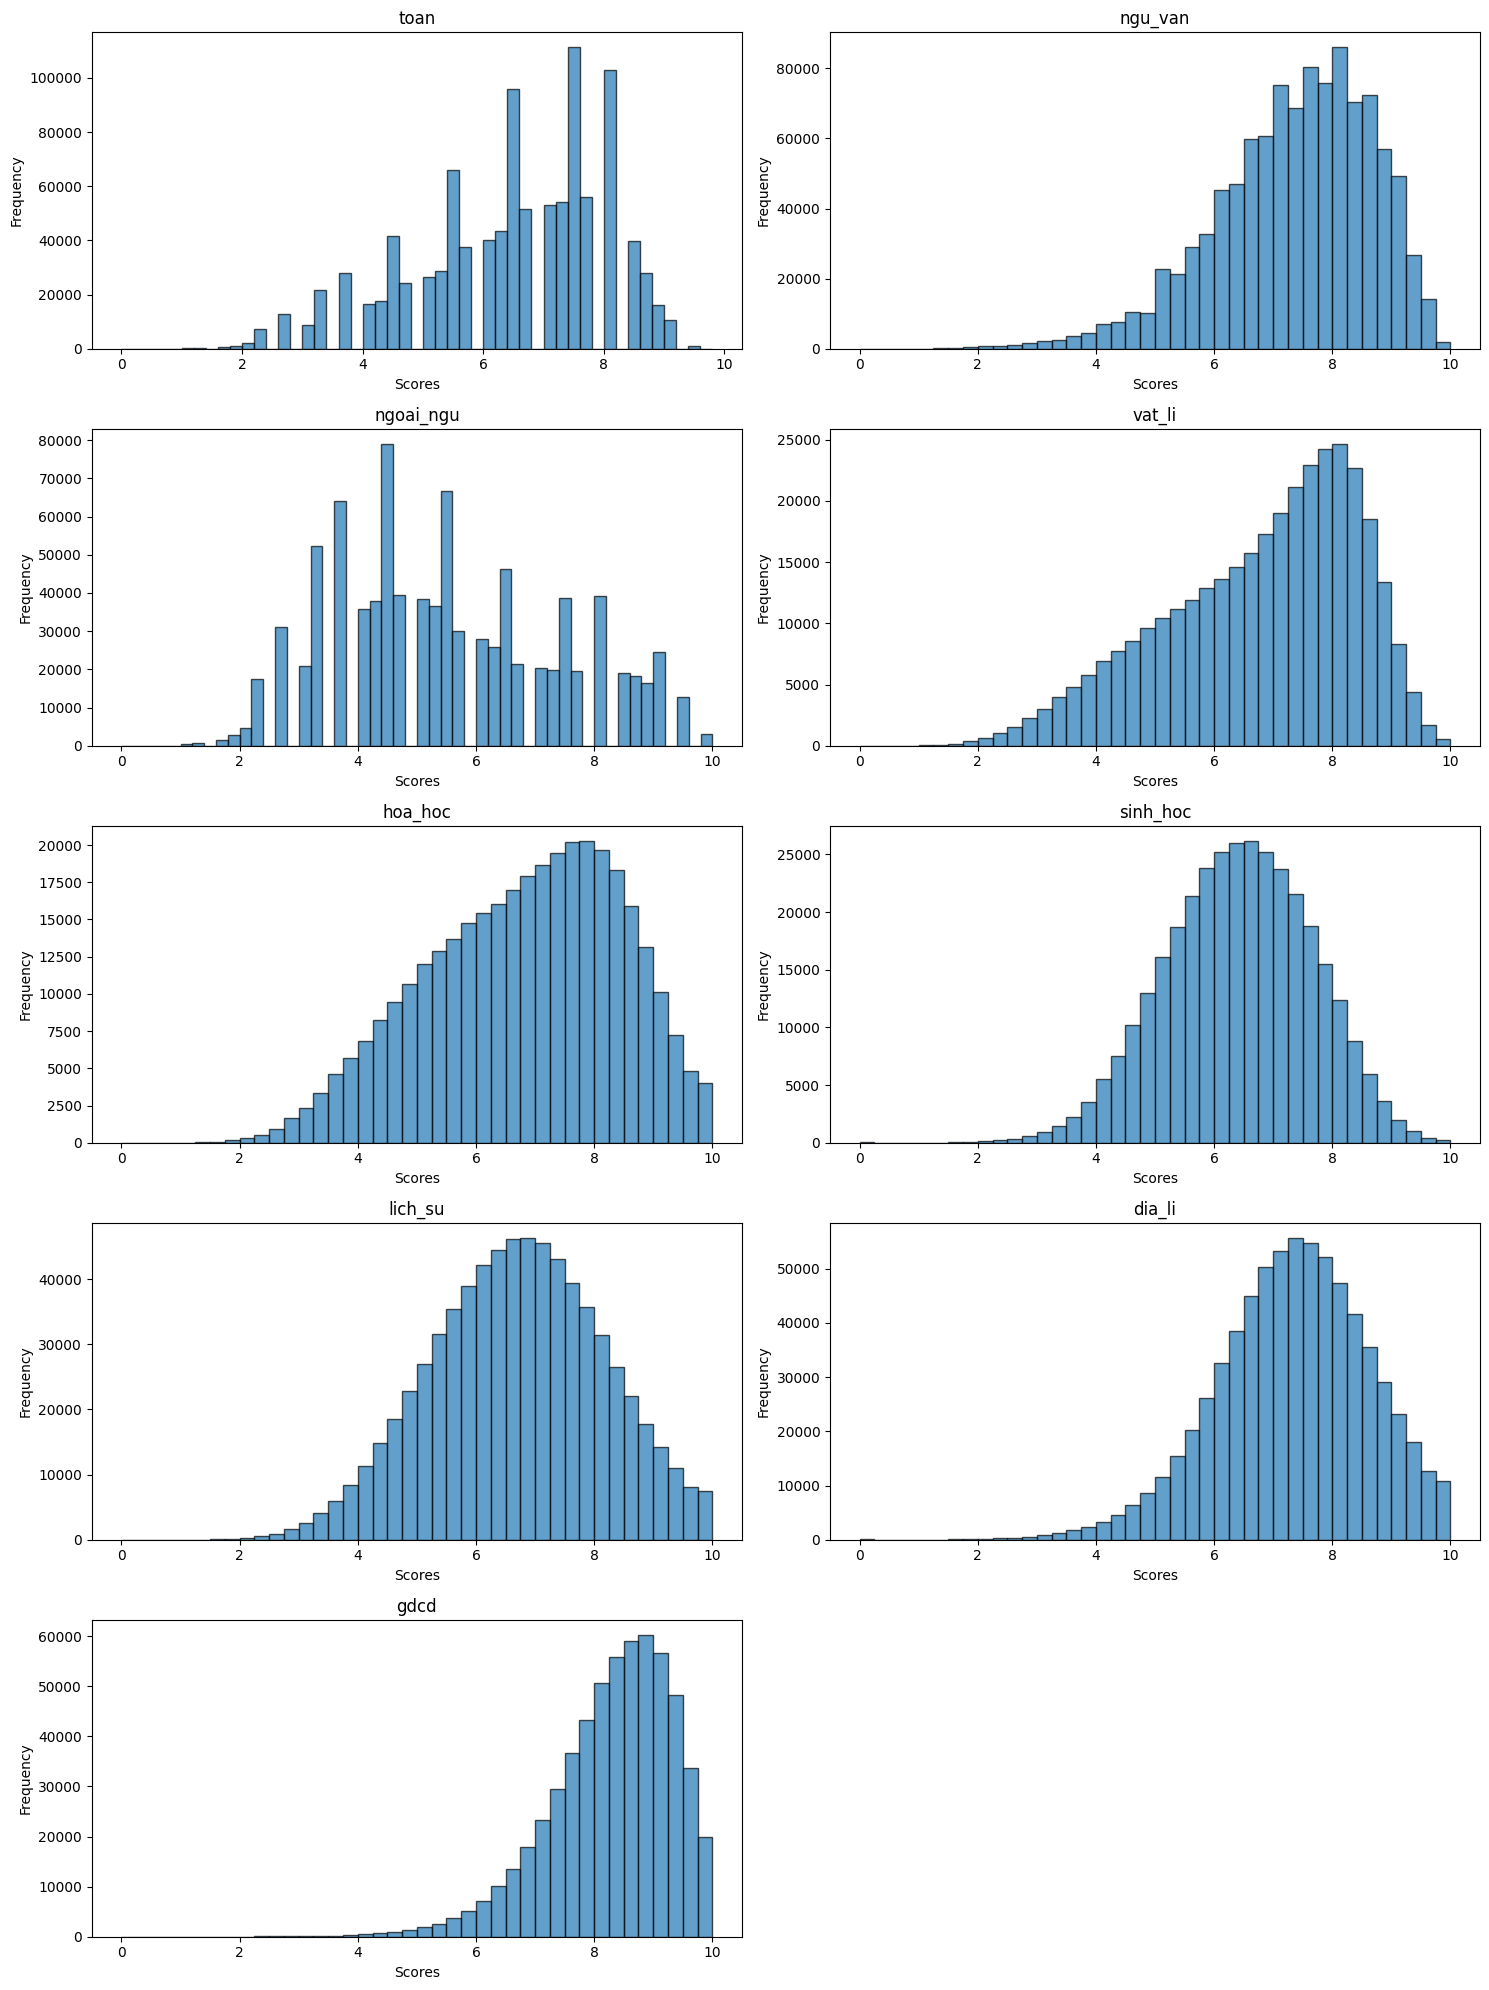

In [18]:
subject_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

plt.figure(figsize=(15, 20))

for i, column in enumerate(subject_columns, 1):
    plt.subplot(5, 2, i)
    if column in ['toan', 'ngoai_ngu']:
        bins = np.arange(data[column].min(), data[column].max() + 0.2, 0.2)
    else:
        bins = np.arange(data[column].min(), data[column].max() + 0.25, 0.25)
    plt.hist(data[column].dropna(), bins=bins, edgecolor='k', alpha=0.7)
    plt.title(column)
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# FIND HIGHEST SCORE IN EACH EXAM BLOCK

In [19]:
exam_blocks = {
    'A': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'A02': ['toan', 'vat_li', 'sinh_hoc'],
    'A03': ['toan', 'vat_li', 'lich_su'],
    'A04': ['toan', 'vat_li', 'dia_li'],
    'A05': ['toan', 'hoa_hoc', 'lich_su'],
    'A06': ['toan', 'hoa_hoc', 'dia_li'],
    'A07': ['toan', 'lich_su', 'dia_li'],
    'A08': ['toan', 'lich_su', 'gdcd'],
    'A09': ['toan', 'dia_li', 'gdcd'],
    'A10': ['toan', 'vat_li', 'gdcd'],
    'A11': ['toan', 'hoa_hoc', 'gdcd'],
    'A12': ['toan', 'lich_su', 'hoa_hoc'],
    'A13': ['toan', 'lich_su', 'hoa_hoc'],
    'A14': ['toan', 'dia_li', 'hoa_hoc'],
    'A15': ['toan', 'gdcd', 'hoa_hoc'],
    'A16': ['toan', 'ngu_van', 'hoa_hoc'],
    'A17': ['toan', 'vat_li', 'lich_su'],
    'A18': ['toan', 'hoa_hoc', 'lich_su'],
    'B': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'B01': ['toan', 'sinh_hoc', 'lich_su'],
    'B02': ['toan', 'sinh_hoc', 'dia_li'],
    'B03': ['toan', 'sinh_hoc', 'ngu_van'],
    'B04': ['toan', 'sinh_hoc', 'gdcd'],
    'B05': ['toan', 'sinh_hoc', 'lich_su'],
    'B06': ['toan', 'sinh_hoc', 'ngoai_ngu'],
    'C': ['ngu_van', 'lich_su', 'dia_li'],
    'C01': ['ngu_van', 'toan', 'vat_li'],
    'C02': ['ngu_van', 'toan', 'hoa_hoc'],
    'C03': ['ngu_van', 'toan', 'lich_su'],
    'C04': ['ngu_van', 'toan', 'dia_li'],
    'C05': ['ngu_van', 'vat_li', 'hoa_hoc'],
    'C06': ['ngu_van', 'vat_li', 'sinh_hoc'],
    'C07': ['ngu_van', 'vat_li', 'lich_su'],
    'C08': ['ngu_van', 'hoa_hoc', 'sinh_hoc'],
    'C09': ['ngu_van', 'vat_li', 'dia_li'],
    'C10': ['ngu_van', 'hoa_hoc', 'lich_su'],
    'D': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D1': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D2': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D3': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D4': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D5': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D6': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D7': ['toan', 'hoa_hoc', 'ngoai_ngu'],
    'D08': ['toan', 'ngoai_ngu', 'sinh_hoc'],
    'D09': ['toan', 'ngoai_ngu', 'lich_su'],
    'D10': ['toan', 'ngoai_ngu', 'dia_li'],
}

results = {}

for block, subjects in exam_blocks.items():
    data[f'total_score_{block}'] = data[subjects].sum(axis=1)
    max_score_row = data.loc[data[f'total_score_{block}'].idxmax()]
    highest_total_score_id = max_score_row['sbd'] 
    
    results[block] = {
        'sbd': highest_total_score_id,
        'total_score': max_score_row[f'total_score_{block}'],
        'scores': max_score_row[subjects].to_dict()
    }

for block, result in results.items():
    print(f"Khoi {block}:")
    print(f"  SBD: {result['sbd']}")
    print(f"  Diem: {result['total_score']}")
    print(f"  Diem thanh phan: {result['scores']}")
    print()


Khoi A:
  SBD: 26020938
  Diem: 29.6
  Diem thanh phan: {'toan': 9.6, 'vat_li': 10.0, 'hoa_hoc': 10.0}

Khoi A01:
  SBD: 2038432
  Diem: 29.6
  Diem thanh phan: {'toan': 9.8, 'vat_li': 10.0, 'ngoai_ngu': 9.8}

Khoi A02:
  SBD: 55010109
  Diem: 28.95
  Diem thanh phan: {'toan': 9.2, 'vat_li': 9.75, 'sinh_hoc': 10.0}

Khoi A03:
  SBD: 2038432
  Diem: 19.8
  Diem thanh phan: {'toan': 9.8, 'vat_li': 10.0, 'lich_su': nan}

Khoi A04:
  SBD: 2038432
  Diem: 19.8
  Diem thanh phan: {'toan': 9.8, 'vat_li': 10.0, 'dia_li': nan}

Khoi A05:
  SBD: 3015805
  Diem: 19.8
  Diem thanh phan: {'toan': 9.8, 'hoa_hoc': 10.0, 'lich_su': nan}

Khoi A06:
  SBD: 3015805
  Diem: 19.8
  Diem thanh phan: {'toan': 9.8, 'hoa_hoc': 10.0, 'dia_li': nan}

Khoi A07:
  SBD: 1034208
  Diem: 28.8
  Diem thanh phan: {'toan': 8.8, 'lich_su': 10.0, 'dia_li': 10.0}

Khoi A08:
  SBD: 28015777
  Diem: 29.15
  Diem thanh phan: {'toan': 9.4, 'lich_su': 10.0, 'gdcd': 9.75}

Khoi A09:
  SBD: 9000428
  Diem: 29.15
  Diem thanh phan

# Visualization of highest scores across different exam blocks

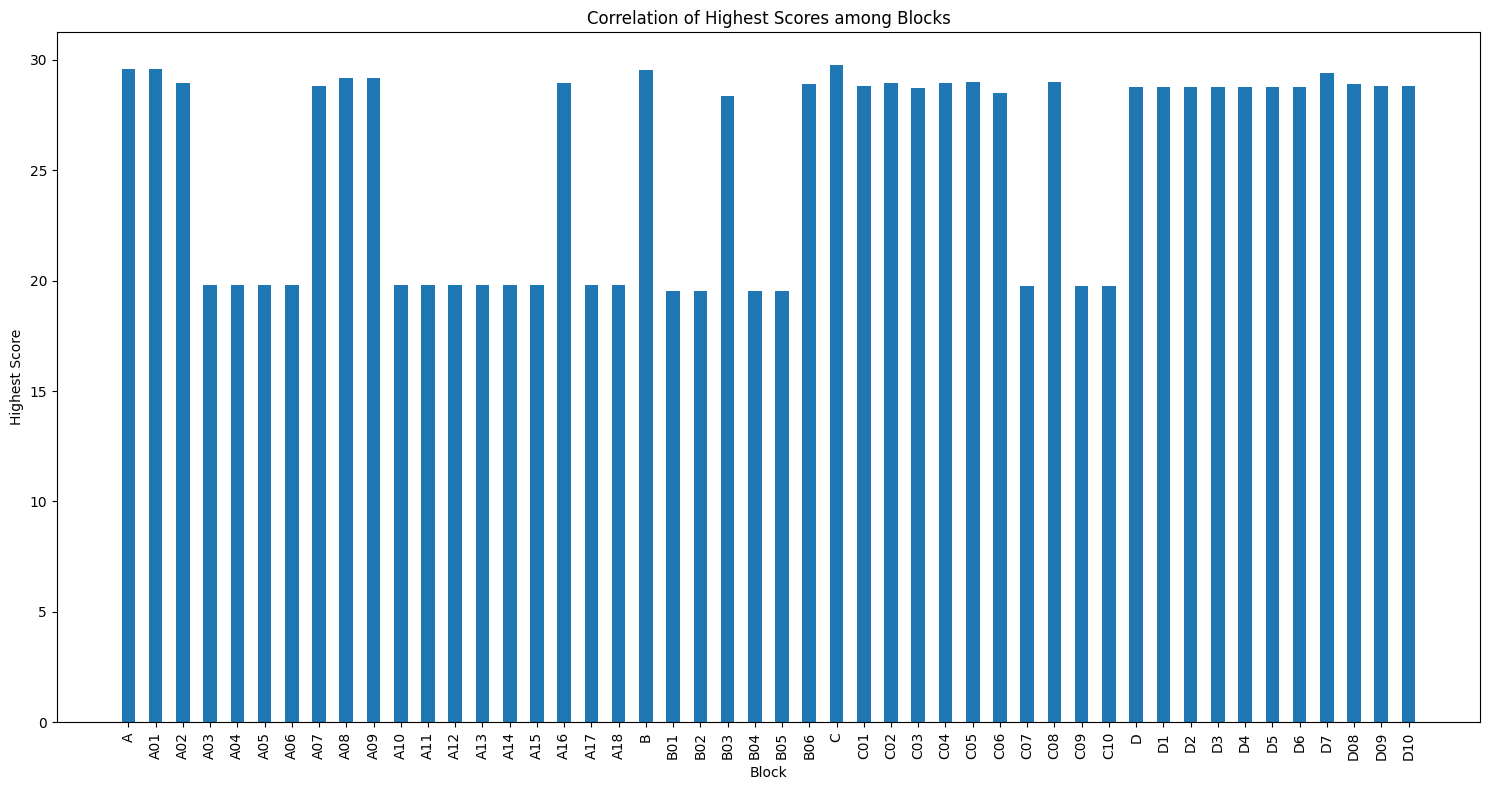

In [20]:
import matplotlib.pyplot as plt

highest_scores = [results[block]['total_score'] for block in exam_blocks.keys()]

bar_width = 0.5

plt.figure(figsize=(15, 8)) 
plt.bar(exam_blocks.keys(), highest_scores, width=bar_width)
plt.xlabel('Block')
plt.ylabel('Highest Score')
plt.title('Correlation of Highest Scores among Blocks')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


In [21]:
exam_blocks = {
    'A': ['toan', 'vat_li', 'hoa_hoc'],
    'A01': ['toan', 'vat_li', 'ngoai_ngu'],
    'B': ['toan', 'hoa_hoc', 'sinh_hoc'],
    'C': ['ngu_van', 'lich_su', 'dia_li'],
    'D01': ['ngu_van', 'toan', 'ngoai_ngu'],
    'D07': ['toan', 'hoa_hoc', 'ngoai_ngu']
}

results = []

for block, subjects in exam_blocks.items():
    data[f'total_score_{block}'] = data[subjects].sum(axis=1)
    
    filtered_students = data[(data[f'total_score_{block}'] >= 27) & (data[subjects].min(axis=1) <= 3)]
    
    for index, row in filtered_students.iterrows():
        results.append({
            'block': block,
            'sbd': row['sbd'],
            'total_score': row[f'total_score_{block}'],
            'scores': row[subjects].to_dict()
        })

for result in results:
    print(f"Block {result['block']}:")
    print(f"  SBD: {result['sbd']}")
    print(f"  Total Score: {result['total_score']}")
    print(f"  Scores: {result['scores']}")
    print()
